In [21]:
!gdown https://raw.githubusercontent.com/devdio/datasets/main/winequality-rw.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/winequality-rw.csv
To: /content/winequality-rw.csv
421kB [00:00, 37.9MB/s]       


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
df = pd.read_csv('/content/winequality-rw.csv',index_col=0)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [24]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
target                  0
dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [26]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [27]:
x = df.drop(['target'], axis=1)
y = df['target']

In [28]:
df['target'].value_counts()

1    4898
0    1599
Name: target, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 2022)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
y_train = y_train.values
x_train.shape

(5197, 12)

In [31]:
model = keras.Sequential([
    layers.Dense(units = 64, activation = 'relu', input_shape = (12,)),
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 8, activation = 'relu'),
    layers.Dense(units = 4, activation = 'relu'),
    layers.Dense(units = 1, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['acc']
)

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                832       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 3,617
Trainable params: 3,617
Non-traina

In [33]:
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(x_train, y_train,
                    epochs = EPOCHS,
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/30
130/130 [==============================] - 1s 5ms/step - loss: 0.2278 - acc: 0.8826 - val_loss: 0.0309 - val_acc: 0.9933
Epoch 2/30
130/130 [==============================] - 0s 3ms/step - loss: 0.0299 - acc: 0.9925 - val_loss: 0.0220 - val_acc: 0.9952
Epoch 3/30
130/130 [==============================] - 0s 3ms/step - loss: 0.0239 - acc: 0.9957 - val_loss: 0.0202 - val_acc: 0.9962
Epoch 4/30
130/130 [==============================] - 0s 3ms/step - loss: 0.0202 - acc: 0.9966 - val_loss: 0.0162 - val_acc: 0.9962
Epoch 5/30
130/130 [==============================] - 0s 3ms/step - loss: 0.0182 - acc: 0.9969 - val_loss: 0.0188 - val_acc: 0.9952
Epoch 6/30
130/130 [==============================] - 0s 3ms/step - loss: 0.0163 - acc: 0.9964 - val_loss: 0.0181 - val_acc: 0.9971
Epoch 7/30
130/130 [==============================] - 0s 3ms/step - loss: 0.0147 - acc: 0.9976 - val_loss: 0.0216 - val_acc: 0.9952
Epoch 8/30
130/130 [==============================] - 0s 3ms/step - loss: 0.

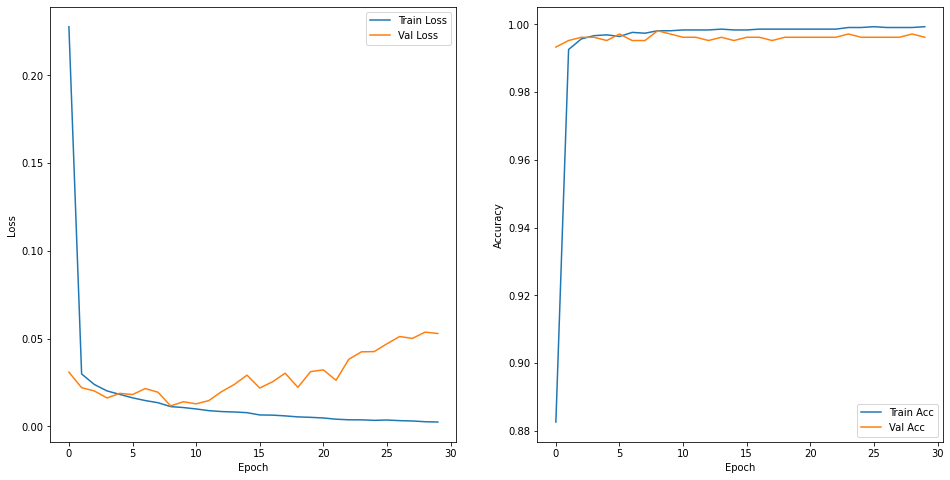

In [34]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Acc')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Acc')

    plt.legend()
    plt.show()

plot_history(history)

In [35]:
x_test_s = scaler.transform(x_test)

model.evaluate(x_test_s, y_test)

41/41 [==============================] - 0s 3ms/step - loss: 0.0502 - acc: 0.9954


[0.050242602825164795, 0.9953846335411072]

In [36]:
y_pred = model.predict(x_test_s)

41/41 [==============================] - 0s 1ms/step


In [37]:
y_pred.flatten()
y_pred

array([[1.0000000e+00],
       [1.0000000e+00],
       [9.9999726e-01],
       ...,
       [9.9991763e-01],
       [9.9998939e-01],
       [2.3623747e-05]], dtype=float32)

In [38]:
y_pred = (y_pred>0.5).astype('int')

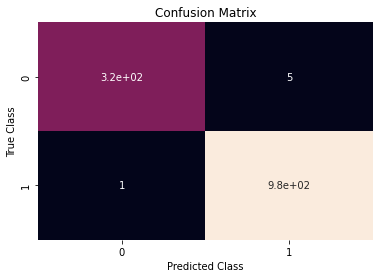

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cfm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cfm, annot = True, cbar = False)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)